In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Read each dataset
def read_csv_file(file_path, thermocouple_type):
    df = pd.read_csv(file_path, index_col=None)
    df['Type'] = thermocouple_type
    return df

type_T = read_csv_file('type_T.csv', 'Type T')
type_K = read_csv_file('type_K.csv', 'Type K')
type_J = read_csv_file('type_J.csv', 'Type J')
type_E = read_csv_file('type_E.csv', 'Type E')
type_B = read_csv_file('type_B.csv', 'Type B')
type_R = read_csv_file('type_R.csv', 'Type R')
type_S = read_csv_file('type_S.csv', 'Type S')

In [4]:
type_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  40 non-null     int64  
 1   1            40 non-null     float64
 2   2            40 non-null     float64
 3   3            40 non-null     float64
 4   Type         40 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ KB


In [5]:
type_B.tail()

,temperature,1,2,3,Type
35,350,0.596,0.599,0.603,Type B
36,360,0.632,0.636,0.639,Type B
37,370,0.669,0.673,0.677,Type B
38,380,0.707,0.711,0.715,Type B
39,390,0.746,0.750,0.754,Type B


In [6]:
type_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  40 non-null     int64  
 1   1            40 non-null     float64
 2   2            40 non-null     float64
 3   3            40 non-null     float64
 4   Type         40 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ KB


In [7]:
type_T.describe()

,temperature,1,2,3
count,40.000000,40.000000,40.000000,40.000000
mean,195.000000,9.405350,9.457325,9.509350
std,116.904519,6.121494,6.128242,6.134931
min,0.000000,0.000000,0.039000,0.078000
25%,97.500000,4.161000,4.207750,4.254750
50%,195.000000,9.021500,9.074500,9.127500
75%,292.500000,14.425750,14.483750,14.541000
max,390.000000,20.252000,20.314000,20.376000


In [8]:
type_S.describe()

,temperature,1,2,3
count,40.000000,40.000000,40.000000,40.000000
mean,195.000000,1.460155,1.468255,1.476320
std,116.904519,0.963764,0.964892,0.965938
min,0.000000,0.000000,0.005400,0.010800
25%,97.500000,0.627150,0.634500,0.641775
50%,195.000000,1.397900,1.406350,1.414750
75%,292.500000,2.254375,2.263475,2.272525
max,390.000000,3.164200,3.173700,3.183300


In [9]:
type_S.head()

,temperature,1,2,3,Type
0,0,0.0000,0.0054,0.0108,Type S
1,10,0.0552,0.0609,0.0666,Type S
2,20,0.1128,0.1187,0.1246,Type S
3,30,0.1727,0.1788,0.1849,Type S
4,40,0.2346,0.2410,0.2473,Type S


In [10]:
data = pd.concat([type_T, type_K, type_J, type_E, type_B, type_R, type_S])

def calculate_seebeck_coefficients(df):
    # Convert the columns to numeric type
    df['1'] = pd.to_numeric(df['1'], errors='coerce')
    df['2'] = pd.to_numeric(df['2'], errors='coerce')
    df['3'] = pd.to_numeric(df['3'], errors='coerce')
    
    # Calculate Seebeck coefficients
    df['Seebeck1'] = ((df['1'].shift(-1) - df['1']) / 10) * 1000
    df['Seebeck2'] = ((df['2'].shift(-1) - df['2']) / 10) * 1000
    df['Seebeck3'] = ((df['3'].shift(-1) - df['3']) / 10) * 1000
    
    return df

data = data.groupby('Type').apply(calculate_seebeck_coefficients)

In [11]:
# Remove the last row of each thermocouple type
def remove_last_row(df):
    return df.iloc[:-1]

data = data.groupby('Type').apply(remove_last_row).reset_index(drop=True)

print(data)

     temperature       1       2       3    Type  Seebeck1  Seebeck2  Seebeck3
0              0   0.000   0.000   0.000  Type B      -0.2      -0.2      -0.2
1             10  -0.002  -0.002  -0.002  Type B      -0.1      -0.1      -0.1
2             20  -0.003  -0.003  -0.003  Type B       0.1       0.1       0.1
3             30  -0.002  -0.002  -0.002  Type B       0.2       0.2       0.2
4             40   0.000   0.000   0.000  Type B       0.2       0.3       0.3
..           ...     ...     ...     ...     ...       ...       ...       ...
268          340  17.217  17.277  17.336  Type T      59.9      60.0      60.1
269          350  17.816  17.877  17.937  Type T      60.4      60.3      60.4
270          360  18.420  18.480  18.541  Type T      60.7      60.8      60.8
271          370  19.027  19.088  19.149  Type T      61.1      61.1      61.2
272          380  19.638  19.699  19.761  Type T      61.4      61.5      61.5

[273 rows x 8 columns]


In [12]:
type_T.head()

,temperature,1,2,3,Type
0,0,0.000,0.039,0.078,Type T
1,10,0.391,0.430,0.470,Type T
2,20,0.789,0.830,0.870,Type T
3,30,1.196,1.237,1.279,Type T
4,40,1.611,1.653,1.695,Type T


In [13]:
type_S.tail()

,temperature,1,2,3,Type
35,350,2.7858,2.7952,2.8046,Type S
36,360,2.8798,2.8892,2.8986,Type S
37,370,2.9742,2.9836,2.9931,Type S
38,380,3.0690,3.0785,3.0860,Type S
39,390,3.1642,3.1737,3.1833,Type S


In [14]:
# Make function to plot each graph
def plot_line_chart(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['temperature'], df['1'], label='1')
    plt.plot(df['temperature'], df['2'], label='2')
    plt.plot(df['temperature'], df['3'], label='3')
    plt.xlabel('Temperature')
    plt.ylabel('Seebeck Coefficient (μV/°C)')
    plt.title(title)
    plt.legend()
    plt.show()

thermocouples = [type_T, type_K, type_J, type_E, type_B, type_R, type_S]
names = ['Type T', 'Type K', 'Type J', 'Type E', 'Type B', 'Type R', 'Type S']


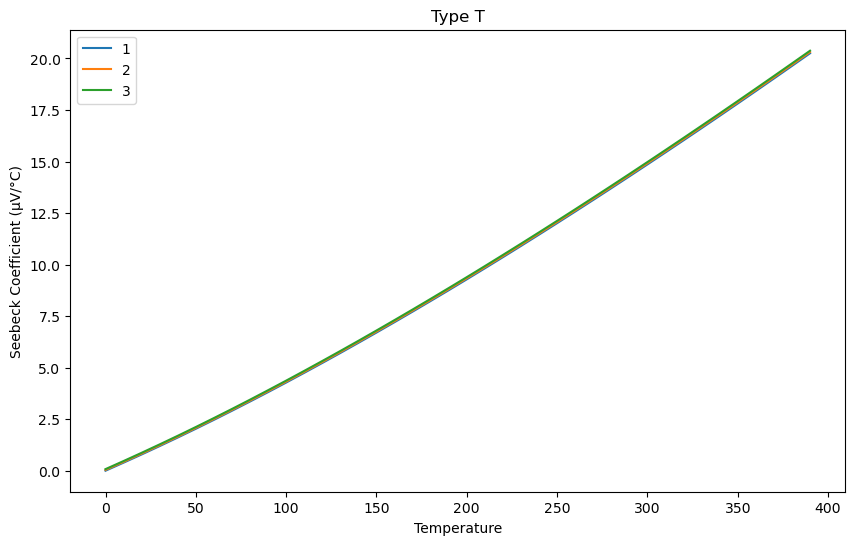

In [15]:
plot_line_chart(type_T, 'Type T')

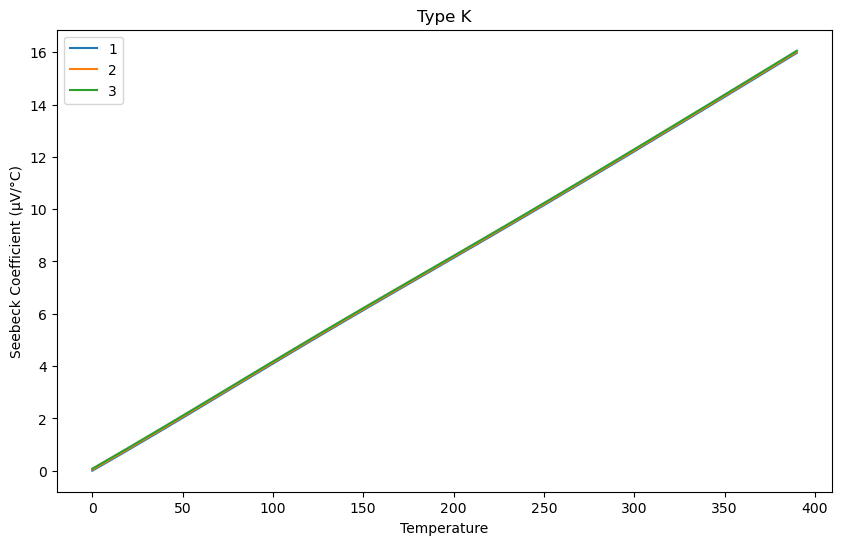

In [15]:
plot_line_chart(type_K, 'Type K')

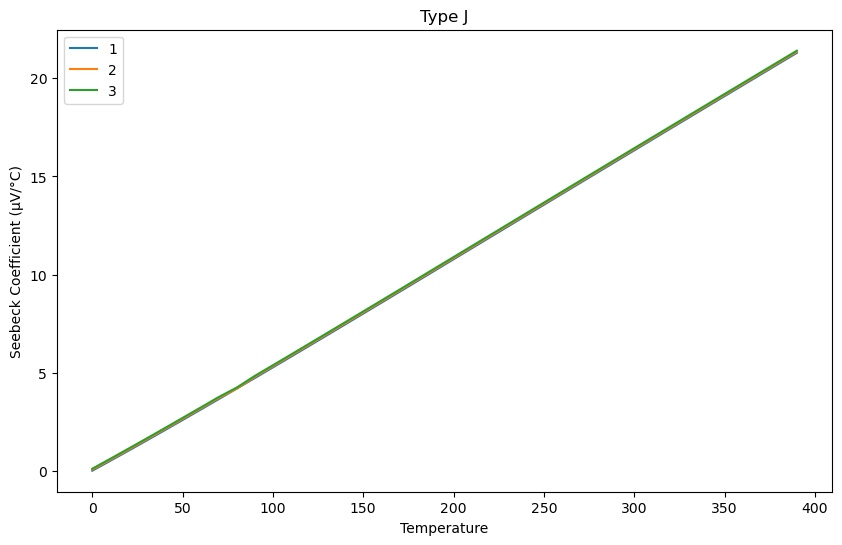

In [16]:
plot_line_chart(type_J, 'Type J')

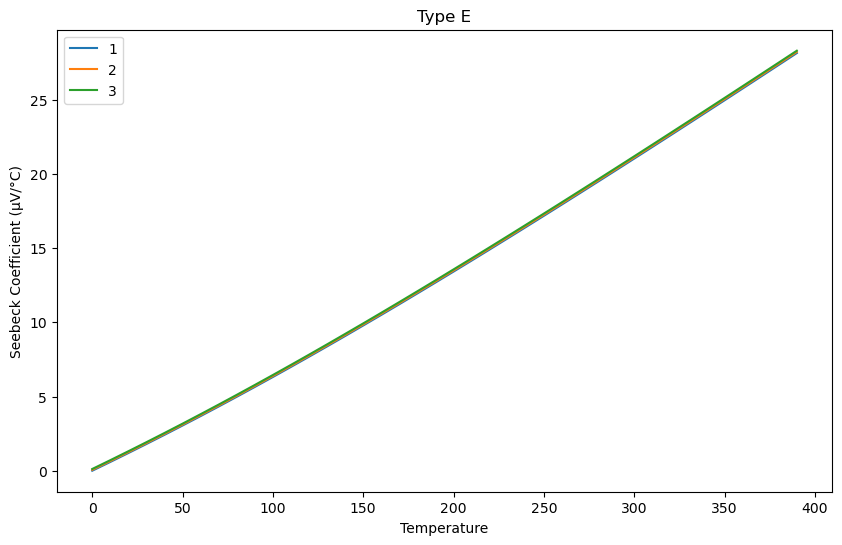

In [17]:
plot_line_chart(type_E, 'Type E')

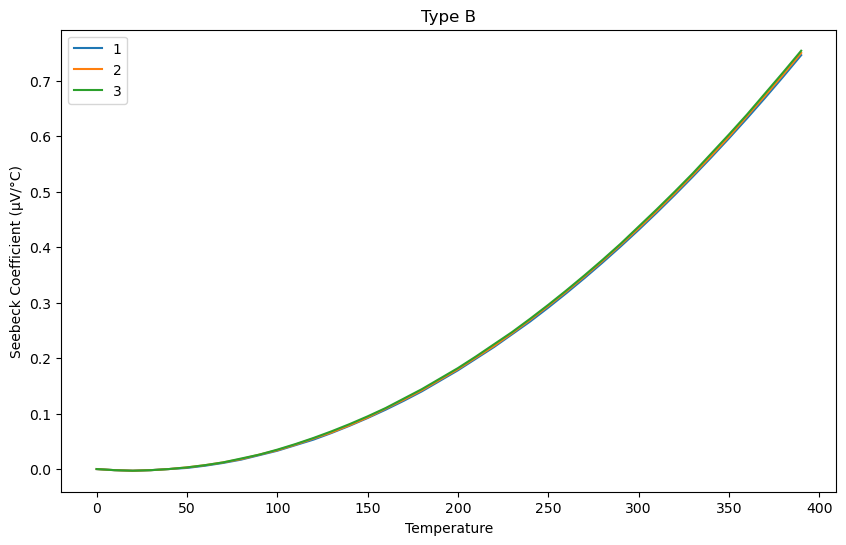

In [18]:
plot_line_chart(type_B, 'Type B')

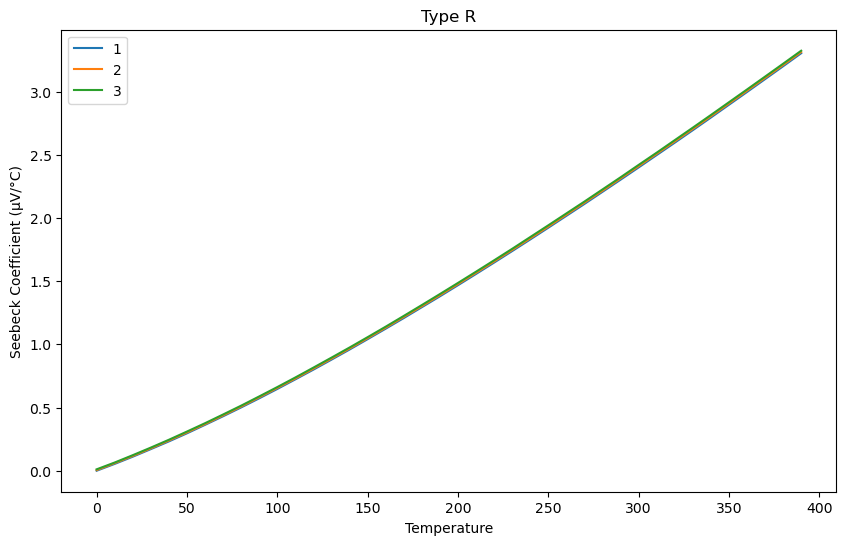

In [19]:
plot_line_chart(type_R, 'Type R')

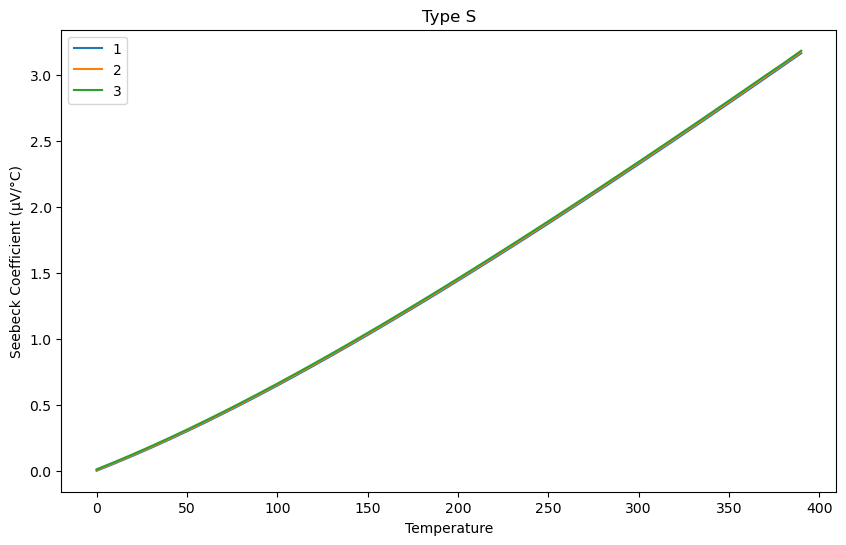

In [20]:
plot_line_chart(type_S, 'Type S')

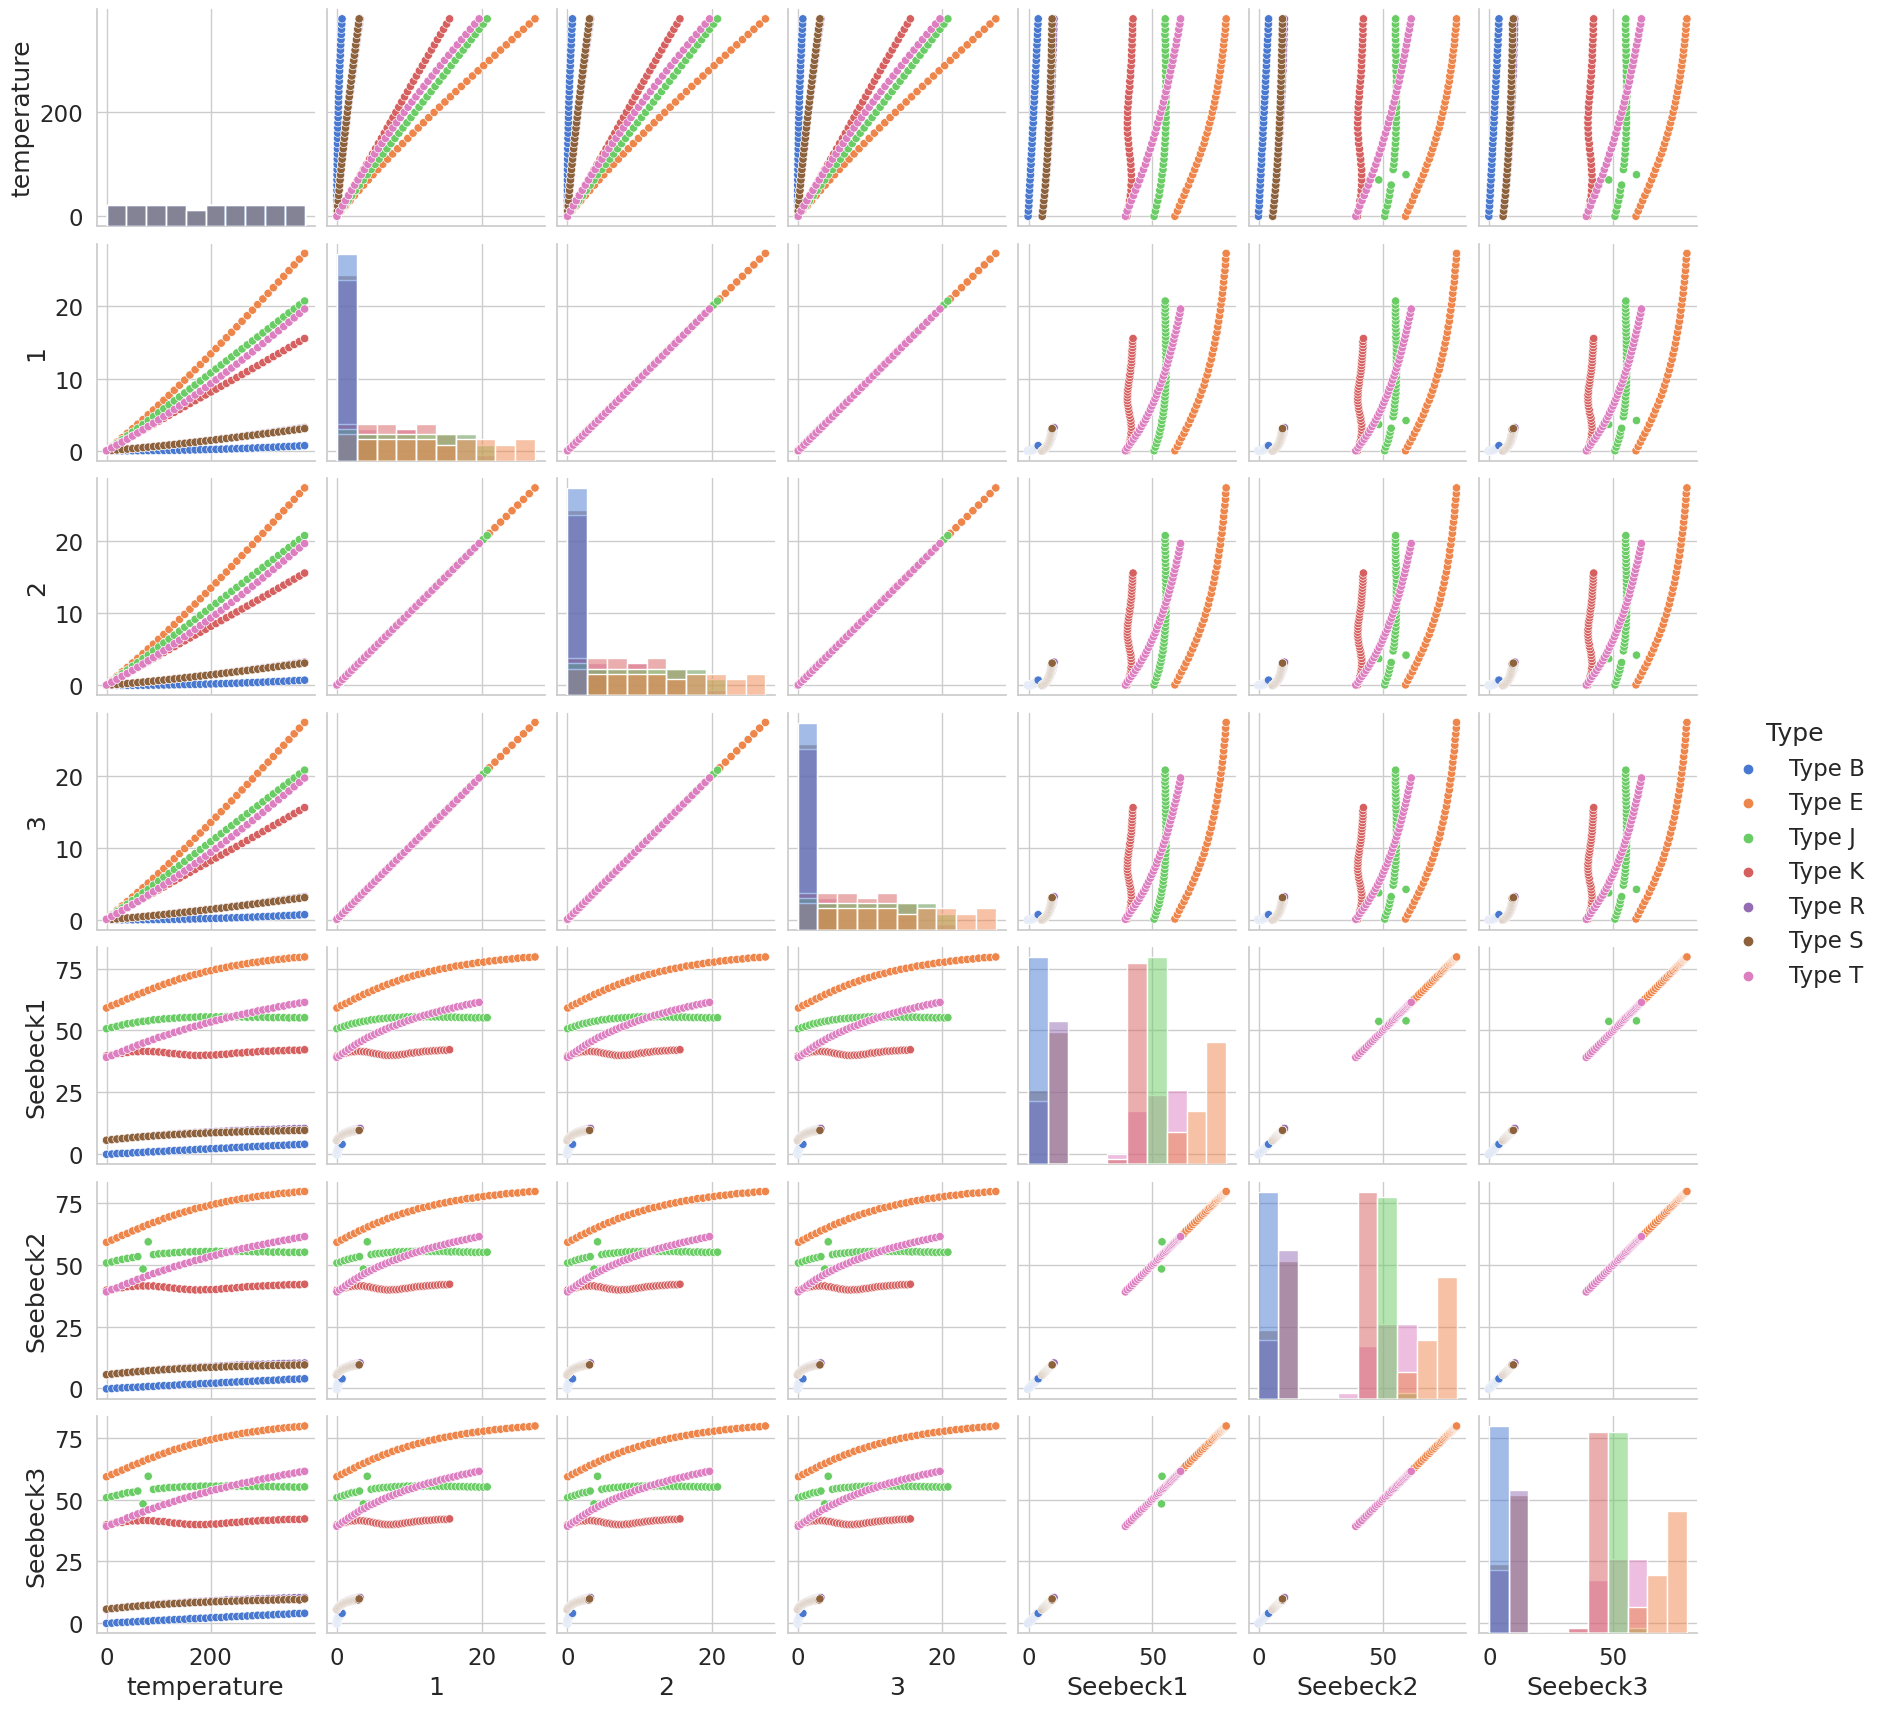

In [223]:
# Pair plots for each thermocouple type to visualize relationships between features
sns.pairplot(data, hue='Type', diag_kind='hist', vars=['temperature', '1', '2', '3', 'Seebeck1', 'Seebeck2', 'Seebeck3'])
plt.show()

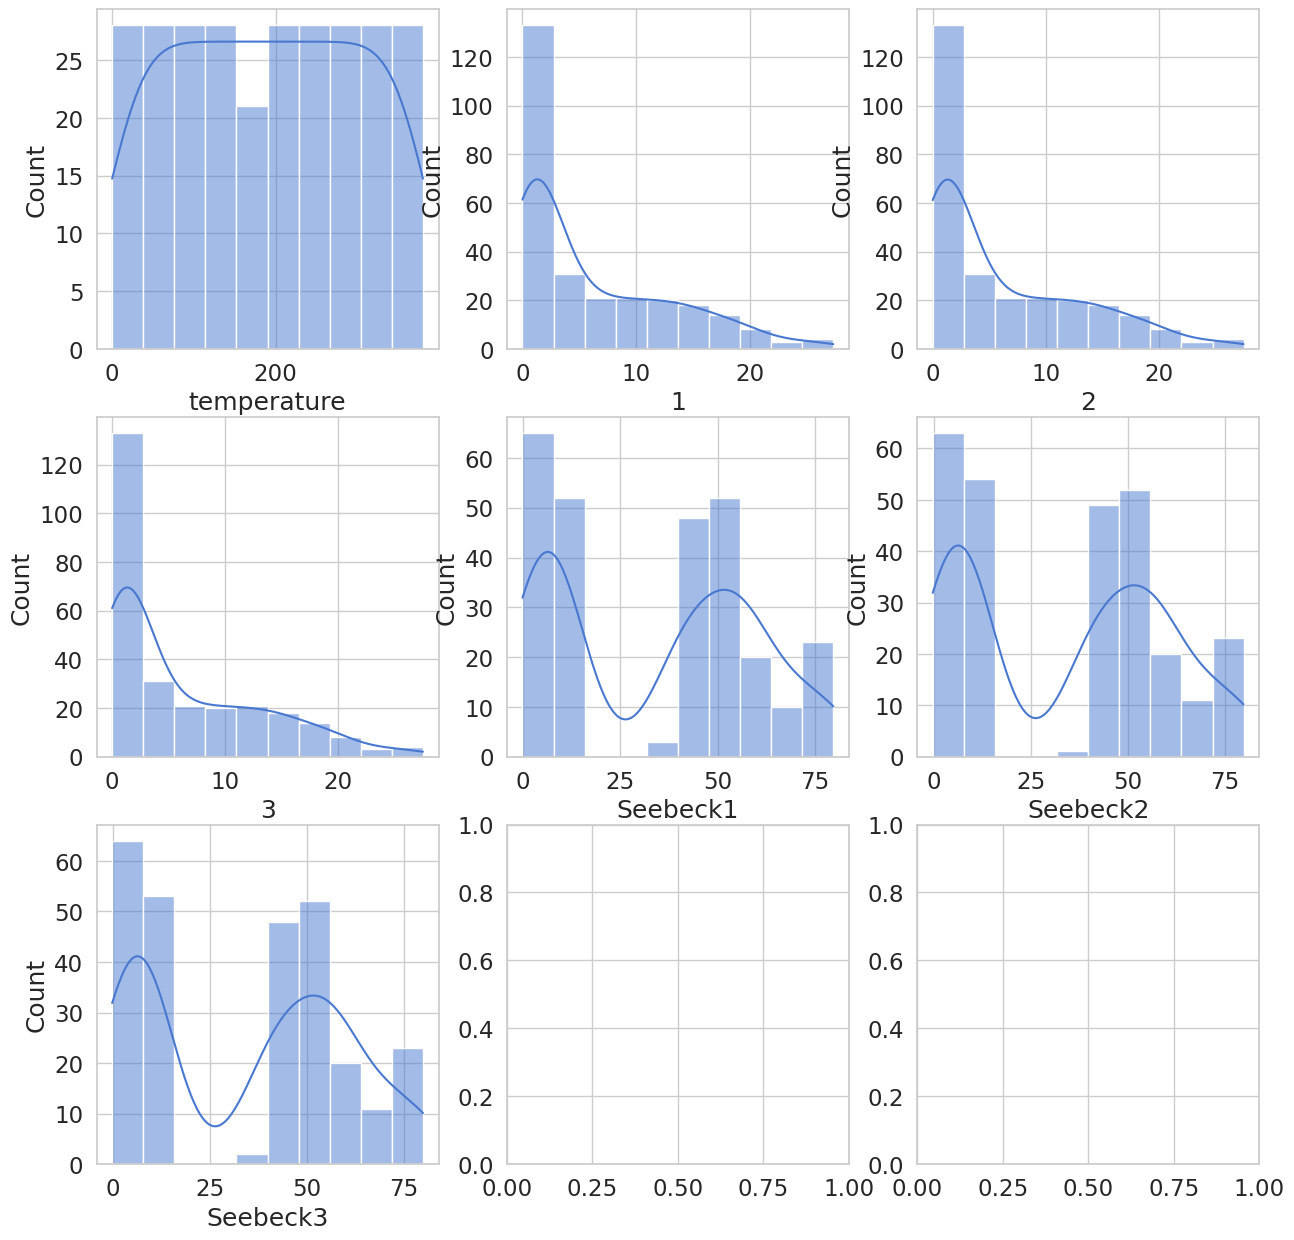

In [224]:
# Histograms for each feature to visualize distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(['temperature', '1', '2', '3', 'Seebeck1', 'Seebeck2', 'Seebeck3']):
    sns.histplot(data=data, x=column, ax=axes[i // 3, i % 3], kde=True)
plt.show()

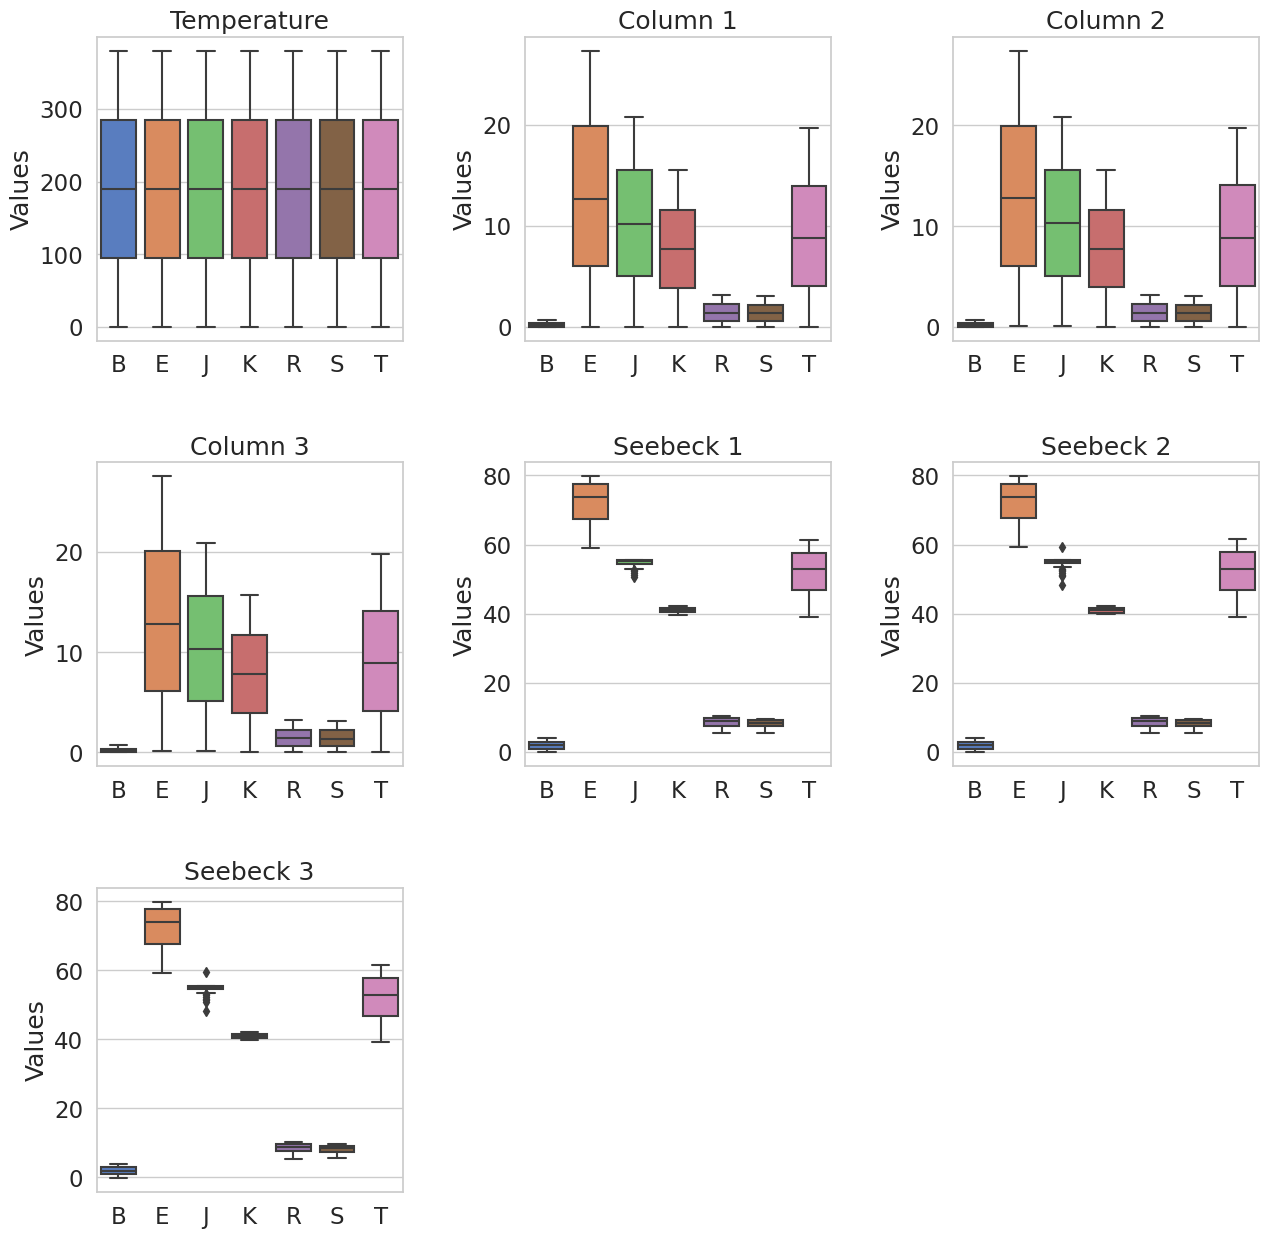

In [225]:
# Box plots for each feature grouped by thermocouple type to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

columns = ['temperature', '1', '2', '3', 'Seebeck1', 'Seebeck2', 'Seebeck3']
labels = ['Temperature', 'Column 1', 'Column 2', 'Column 3', 'Seebeck 1', 'Seebeck 2', 'Seebeck 3']

for i, (column, label) in enumerate(zip(columns, labels)):
    ax = axes[i // 3, i % 3]
    sns.boxplot(data=data, x='Type', y=column, ax=ax)
    ax.set_title(label)
    ax.set_ylabel('Values')
    ax.set_xlabel('')

    # Modify x-axis labels to display only the letter of the thermocouple type
    xticklabels = [ticklabel.get_text().split(' ')[1] for ticklabel in ax.get_xticklabels()]
    ax.set_xticklabels(xticklabels)

# Remove unused subplots
for j in range(i+1, 9):
    fig.delaxes(axes[j // 3, j % 3])

plt.show()


In [ ]:
# Add Mean_Seebeck column
data['Mean_Seebeck'] = data[['Seebeck1', 'Seebeck2', 'Seebeck3']].mean(axis=1)

In [ ]:
# Split the data into training and testing sets
X = data.drop(columns=['Seebeck1', 'Seebeck2', 'Seebeck3', 'Mean_Seebeck', 'Type'])
y = data[['Mean_Seebeck', 'Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machines': SVR()
}

print("Model Performance:")
print("-" * 25)
for model_name, model in models.items():
    model.fit(X_train, np.ravel(y_train.drop(columns=['Type'])))
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test.drop(columns=['Type']), y_pred)
    r2 = r2_score(y_test.drop(columns=['Type']), y_pred)
    
    scores = cross_val_score(model, X, np.ravel(y.drop(columns=['Type'])), cv=5, scoring='neg_mean_squared_error')
    cv_mse = -np.mean(scores)
    cv_r2 = np.mean(cross_val_score(model, X, np.ravel(y.drop(columns=['Type'])), cv=5, scoring='r2'))
    
    print(f'{model_name}:')
    print(f'  MSE: {mse:.2f}')
    print(f'  R-squared: {r2:.4f}')
    print(f'  Cross-Validation MSE: {cv_mse:.2f}')
    print(f'  Cross-Validation R-squared: {cv_r2:.4f}')
    print()

Model Performance:
-------------------------
Linear Regression:
  MSE: 0.22
  R-squared: 0.9996
  Cross-Validation MSE: 4.43
  Cross-Validation R-squared: 0.9511

Random Forest:
  MSE: 33.98
  R-squared: 0.9457
  Cross-Validation MSE: 93.68
  Cross-Validation R-squared: -4.5308

Gradient Boosting:
  MSE: 36.52
  R-squared: 0.9416
  Cross-Validation MSE: 76.03
  Cross-Validation R-squared: -1.3867

Support Vector Machines:
  MSE: 622.84
  R-squared: 0.0049
  Cross-Validation MSE: 1323.55
  Cross-Validation R-squared: -231.7243



In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

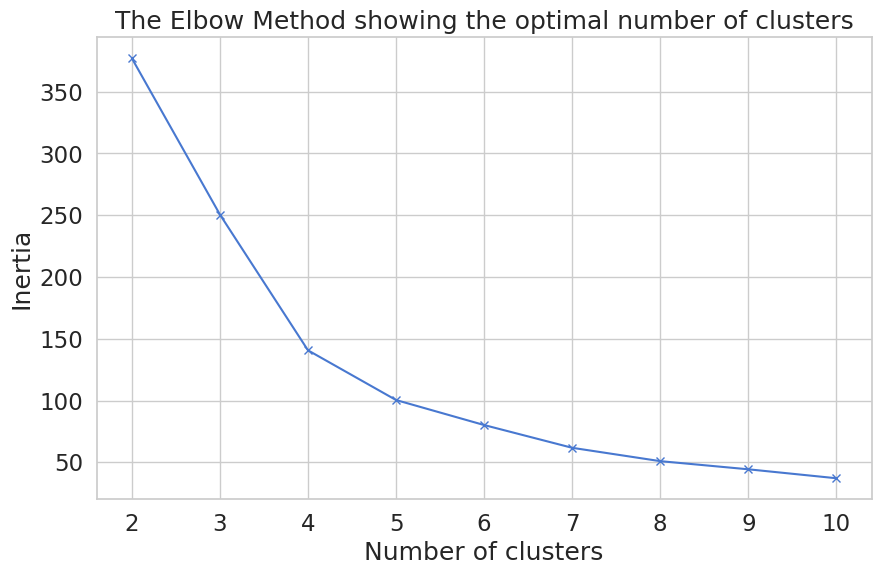

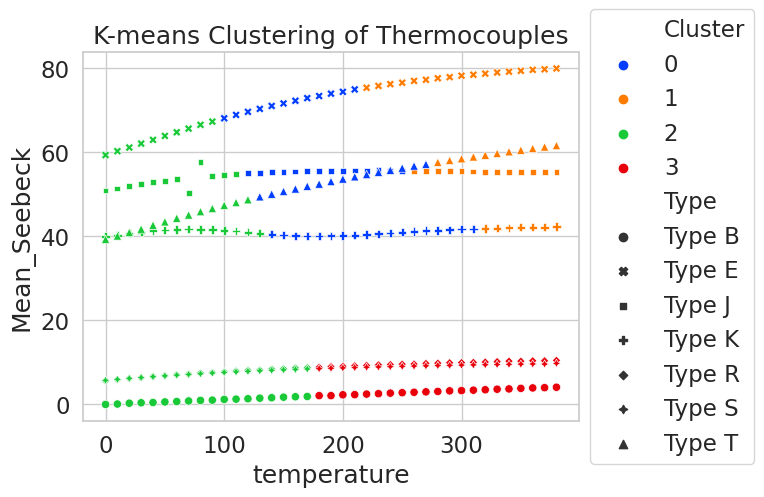

In [233]:
# Apply K-means clustering
optimal_k = 4  # Choose the optimal number of clusters based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_

In [ ]:
# Add the cluster labels to the dataset
data['Cluster'] = labels


In [ ]:
# Visualize the clusters
sns.scatterplot(data=data, x='temperature', y='Mean_Seebeck', hue='Cluster', style='Type', palette='bright')
plt.title('K-means Clustering of Thermocouples')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

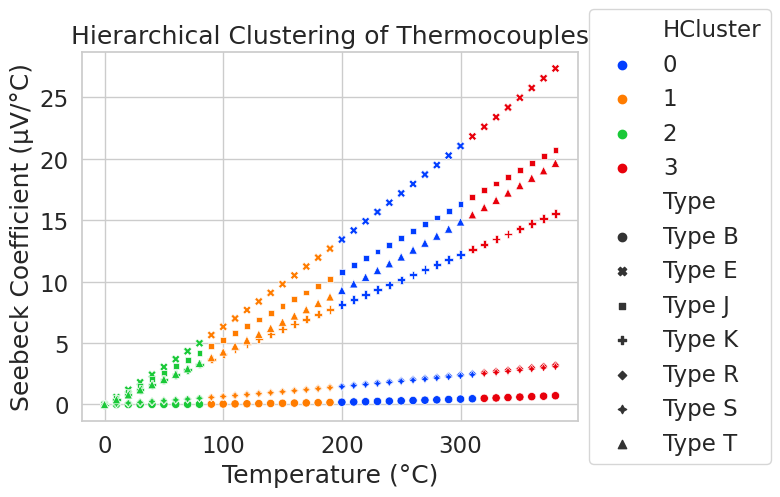

In [246]:
# Prepare the dataset for clustering
X = data[['temperature', '1', '2', '3']]

In [ ]:
# Apply hierarchical clustering
hclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
data['HCluster'] = hclust.fit_predict(X)

In [ ]:
# Visualize the clusters
sns.scatterplot(data=data, x='temperature', y='1', hue='HCluster', style='Type', palette='bright')
plt.title('Hierarchical Clustering of Thermocouples')
plt.xlabel('Temperature (°C)')
plt.ylabel('Seebeck Coefficient (μV/°C)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [243]:
# Compute distance between clusters
def compute_average_distance_within_cluster(cluster_data):
    if len(cluster_data) < 2:
        return File
    distances = pdist(cluster_data)
    return np.mean(distances)

cluster_groups = data.groupby('Cluster')
cluster_distances = {}

for cluster, group in cluster_groups:
    group_data = group.drop(columns=['Type', 'Cluster', 'Mean_Seebeck'])
    avg_distance = compute_average_distance_within_cluster(group_data)
    cluster_distances[cluster] = avg_distance

cluster_distances_df = pd.DataFrame.from_dict(cluster_distances, orient='index', columns=['Average Distance'])

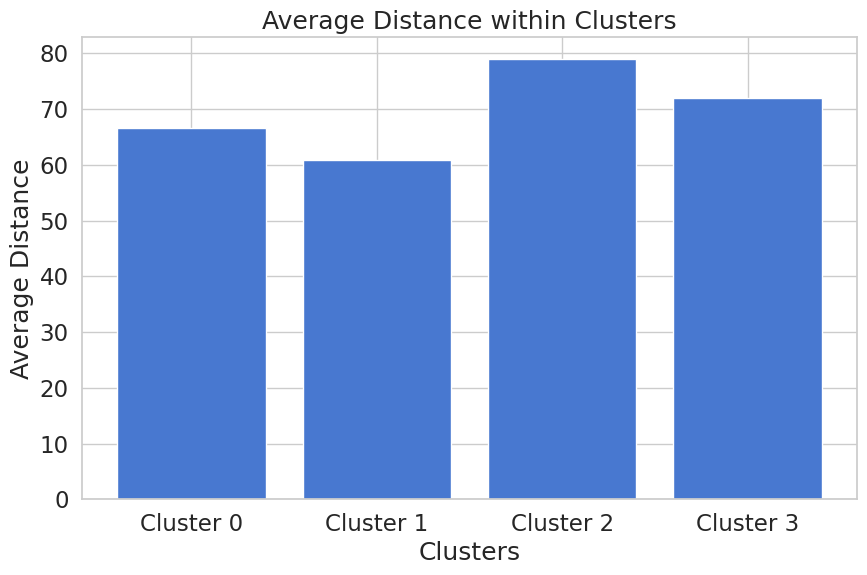

In [244]:
#Plot the cluster distances
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
average_distances = cluster_distances_df['Average Distance'].values

plt.figure(figsize=(10, 6))
plt.bar(clusters, average_distances)
plt.xlabel('Clusters')
plt.ylabel('Average Distance')
plt.title('Average Distance within Clusters')
plt.show()